Garrison Eatmon

__Importing Functions and Libraries__

In [ ]:
!pip install haversxine

In [ ]:
import numpy as np
import matplotlib.pyplot as plt
import pandas as pd
from haversine import haversine, Unit
import random
import itertools
import warnings
import scipy.stats as st
warnings.filterwarnings('ignore')

__Code To Generate Location Distribution__ <br>

In [ ]:
df = pd.read_csv('ProjectData.csv')
locs = {'buffalo':(-78.8784,   42.8864), 'rochester':(-77.6088  , 43.1566), 'elmira':(-76.8077  , 42.0898), 'ithaca':(-76.5019  , 42.4440), 'sayre':(-76.5155  , 41.9790), 'watertown':(-75.9108  , 43.9748), 'syracuse':(-76.1474  , 43.0481), 'binghampton':(-75.9180  , 42.0987), 'utica':(-75.2327  , 43.1009), 'albany':(-73.7562  , 42.6526)}


In [ ]:
max_long, min_long = max(-df['Lon']), min(-df['Lon'])
max_lat , min_lat  = max(df['Lat']) , min( df['Lat'])
print('Min Longitude: ' + str(min_long) + ', Max Longitude: ' + str(max_long))
print('Min Latitude:   ' + str(min_lat) + ' , Max Latitude:   ' + str(max_lat))

Min Longitude: -78.89827431, Max Longitude: -73.70639871
Min Latitude:   41.9791734 , Max Latitude:   44.17373357


In [ ]:
min_long, max_long = -78.9, -73.7
min_lat , max_lat  =  41.95,  44.35
print('Min Longitude: ' + str(min_long) + ', Max Longitude: ' + str(max_long))
print('Min Latitude:   ' + str(min_lat) + ' , Max Latitude:   ' + str(max_lat))

Min Longitude: -78.9, Max Longitude: -73.7
Min Latitude:   41.95 , Max Latitude:   44.35


In [ ]:
width, height = round(max_long - min_long, 2), round(max_lat - min_lat, 2)
print('Width:  ' + str(width))
print('Height: ' + str(height))

Width:  5.2
Height: 2.4


In [ ]:
ss = 0.1
x_ticks, y_ticks = [], []
for i in range(int(width  / ss) + 1): x_ticks.append(round(min_long + (i * ss),2))
for j in range(int(height / ss) + 2): y_ticks.append(round(min_lat +  (j * ss),2))

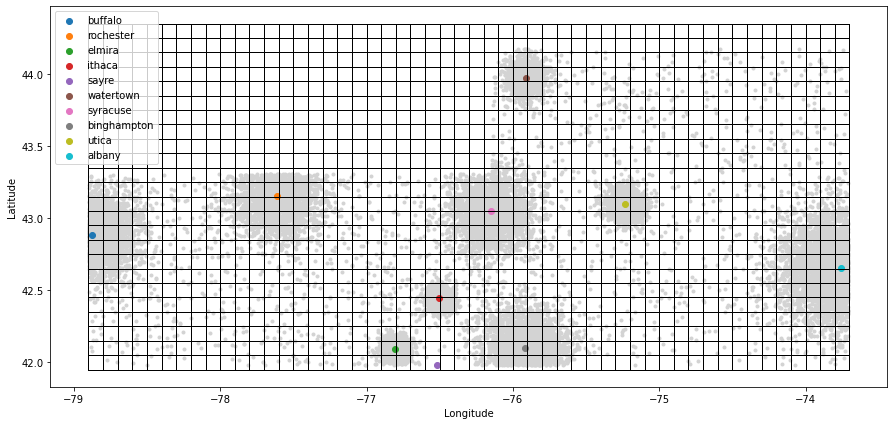

In [ ]:
plt.figure(figsize=(15, 7))
plt.scatter(-df['Lon'], df['Lat'],   marker='.', color='lightgrey')
for hosp in locs.keys(): plt.scatter(locs[hosp][0], locs[hosp][1], label=hosp)
for x in x_ticks: plt.plot([x, x], [min_lat, max_lat], color = 'black', linewidth = 1)
for y in y_ticks: plt.plot([min_long, max_long], [y, y], color = 'black', linewidth = 1)
plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.legend(); plt.show()

In [ ]:
def get_i_val(x):
    for i in i_vals:
        if x > min_long + (i * ss) and x <= min_long + ((i + 1) * ss): return i

def get_j_val(y):
    for j in j_vals:
        if y > min_lat + (j * ss) and y <= min_lat + ((j + 1) * ss): return j

In [ ]:
i_vals, j_vals = range(round(width /  ss)), range(round(height / ss))
dic = {}
for i in i_vals:
    for j in j_vals: dic[(i,j)] = 0

In [ ]:
for k in range(len(df)):
    x, y = -df.iloc[k]['Lon'], df.iloc[k]['Lat']
    i = get_i_val(x)
    j = get_j_val(y)
    dic[(i,j)] += (1 / len(df))

In [ ]:
x_vals_for_i = list(min_long + np.array(i_vals) * ss)

In [ ]:
y_vals_for_j = list(min_lat + np.array(j_vals) * ss)

In [ ]:
x_dic = {i:round(min_long + (i * ss),3) for i in i_vals}
y_dic = {j:round(min_lat + (j * ss),3) for j in j_vals}

__Simulation Class__

In [ ]:
# class S (an instance is created for each simulation that is run)
class S():

  # initialize each simulation instance
  def __init__(self, seed = 1):

    # initialize all of the simulation state variables
    self.dic            = dic 
    self.events         = []
    self.bases          = []
    self.helis          = []
    self.active_calls   = []
    self.finished_calls = []
    self.arrival_events = []
    self.batched_calls  = []

    # set the seeds used for common random numbers
    self.rng_z   = np.random.RandomState(seed * 1)
    self.rng_lon = np.random.RandomState(seed * 2)
    self.rng_lat = np.random.RandomState(seed * 3)
    self.rng_arrival_time      = np.random.RandomState(seed * 4)
    self.rng_cancel_time       = np.random.RandomState(seed * 5)
    self.rng_hd_delay_time     = np.random.RandomState(seed * 6)
    self.rng_prep_time         = np.random.RandomState(seed * 7)
    self.rng_safe_to_fly       = np.random.RandomState(seed * 8)
    self.rng_scene_time        = np.random.RandomState(seed * 9)
    self.rng_to_trauma         = np.random.RandomState(seed * 10)
    self.rng_hospital_time     = np.random.RandomState(seed * 11)
    self.rng_time_exponential  = np.random.RandomState(12)
    self.rng_time_uniform      = np.random.RandomState(13)

  # class attributes regarding constants and distribution parameters
  max_bases = 5
  max_helis = 12
  max_dist  = 180 
  max_speed = 160
  h         = 0.807
  fraction_unsafe = 0.101
  locs = {'buffalo':(-78.8784,   42.8864), 'rochester':(-77.6088  , 43.1566), 'elmira':(-76.8077  , 42.0898), 'ithaca':(-76.5019  , 42.4440), 
          'sayre':(-76.5155  , 41.9790), 'watertown':(-75.9108  , 43.9748), 'syracuse':(-76.1474  , 43.0481), 'binghampton':(-75.9180  , 42.0987), 
          'utica':(-75.2327  , 43.1009), 'albany':(-73.7562  , 42.6526)}
  heli_statuses   = ['AtBase','AwaitingClearance','PrepForCall','OnWayToScene','AtScene','OnWayToHosp','AtHosp','OnWayToBase']
  event_kinds     = ['CallArrival','CallCancelled','CallFinishesAtHD','HeliDepartsForCall','HeliArrivesAtScene','HeliDepartsFromScene',
                 'HeliArrivesAtHosp','HeliDepartsHosp','HeliArrivesAtBase']
  arrival_rates   = [0.723, 0.618, 0.374, 0.319, 0.266, 0.277, 0.489, 0.777, 1.70, 2.75, 3.19, 3.72, 3.96, 3.67, 3.81, 3.68, 3.56, 
                   3.20, 3.05, 2.28, 1.40, 1.17, 0.881, 0.813]
  trauma_centers  = ['rochester', 'syracuse', 'albany', 'sayre']
  hospitals       = ['buffalo', 'rochester', 'elmira', 'ithaca', 'sayre', 'watertown', 'syracuse', 'binghampton', 'utica', 'albany']

  # helicopter class (instance created for each helicopter object in the simulation)
  class Heli():
    def __init__(self, base):
      self.base, self.status = base, 'AtBase'
      self.destination, self.call, self.cttb  = None,None,None
      self.locs_calls, self.locs_pickups = [], []

  # call class (instance created for each call generated in the simulation)
  class Call():
    def __init__(self, location, time_recieved):
      self.location, self.time_recieved = location, time_recieved
      self.cancel_time, self.heli, self.dispatched, self.response_time, self.hospital, self.unsafe, self.time_to_hosp, self.time_at_hosp, self.time_at_scene, self.heli_avail, self.cancel_delay  = None,None,None,None,None,None,None,None,None,None,None
      self.nearest_base, self.base_used = None, None

  # event class (instance created for each event generated in the simulation)
  class Event():
    def __init__(self, kind, time, heli = None, location = None):
      assert kind in S.event_kinds
      self.kind, self.time, self.heli, self.location = kind, time, heli, location 
      if self.kind == 'CallArrival': assert self.location is not None

  # function to adjust the distribution of call arrival locations
  def make_new_dic(self, bases):
    dist_dic = {}
    for i,j in self.dic.keys():
      x, y = x_dic[i], y_dic[j]
      min_dist = np.inf
      for base in bases:
        dist = haversine((x,y), S.locs[base])
        if dist < min_dist: min_dist = dist
      dist_dic[(i,j)] = dist
    avg_dist = np.mean(list(dist_dic.values()))
    max_dist = max(list(dist_dic.values()))
    min_dist = min(list(dist_dic.values()))
    new_dic = {}
    res = []
    for i,j in self.dic.keys(): new_dic[(i,j)] = (avg_dist - dist_dic[(i,j)] + max_dist) * self.dic[(i,j)]
    normalizing = sum(new_dic.values())
    for i,j in new_dic.keys():
      new_dic[(i,j)] = new_dic[(i,j)] / normalizing 
    assert round(sum(new_dic.values()), 3) == 1
    return new_dic

  # returns the cancel time given a call arrival time in units of hours
  def generate_cancel_time(self): return self.rng_cancel_time.exponential(4.874)

  # returns the closest available helicopter if there is one available and None otherwise
  def get_closest_available_helicopter(self, call):
    assert type(call) == S.Call
    closest_heli, closest_dist = None, np.inf
    for h in [h for h in self.helis if h.status == 'AtBase']:
      dist = haversine(call.location, S.locs[h.base])
      if dist < closest_dist and dist <= S.max_dist:
        closest_heli, closest_dist = h, dist 
    return closest_heli

  # returns the hd delay time in units of hours
  def generate_hd_delay_time(self): return self.rng_hd_delay_time.triangular(5,7,10) / 60

  # generates the next arrival time using thinning
  def generate_next_time(self, time):
    while True:
      time += self.rng_time_exponential.exponential(1/self.lam_star)
      if self.rng_time_uniform.uniform(0,1) <= self.arrival_rates[np.floor(time % 24).astype(int)] / self.lam_star: return time
  
  # returns a point for the next arrival using thinning
  def generate_point(self):
    Z = max(self.dic.values()) * self.rng_z.uniform(0,1)
    min_long, max_long = -78.9, -73.7
    min_lat , max_lat  =  41.95,  44.35
    X, Y = self.rng_lon.uniform(min_long, max_long), self.rng_lat.uniform(min_lat, max_lat)
    I, J = get_i_val(X), get_j_val(Y)
    if Z <= self.dic[(I,J)]: return (X, Y)
    else: return self.generate_point()

  # returns an event of type 'CallArrival' at a specific time and location 
  def generate_call_arrival_event(self, time):
    loc = self.generate_point()
    return S.Event( kind = 'CallArrival', time = self.generate_next_time(time), heli = None, location = loc) 

  # function called when 'CallArrival' event occurs to update system state and generate new events
  def call_arrival(self, time, location):
    call = S.Call(location, time)
    call.nearest_base = self.get_nearest_base(call)
    call.cancel_time = time + self.generate_cancel_time()
    heli = self.get_closest_available_helicopter(call)
    if heli is not None:
      call.heli_avail = True
      call.base_used = heli.base
      self.active_calls.append(call)
      call.heli, heli.call = heli, call
      heli.locs_calls.append(call.location)
      heli.status = 'AwaitingClearance'
      hd_delay_time = self.generate_hd_delay_time()
      if time + hd_delay_time < call.cancel_time: self.events.append( S.Event( kind = 'CallFinishesAtHD', time = time + hd_delay_time, heli = heli ) )
      else: self.events.append( S.Event( kind = 'CallCancelled', time = call.cancel_time, heli = heli ) )
    else:
      call.heli_avail = False 
      call.dispatched  = False
      self.finished_calls.append(call)
    e = self.generate_call_arrival_event(time)
    self.arrival_events.append(e)
    self.events.append( e )

  # returns the travel time between two locations l1 and l2
  def get_travel_time(self, l1, l2):
    return haversine(l1, l2) / S.max_speed

  # function called when 'CallCancelled' event occurs to update system state and generate new events
  def call_cancelled(self, time, heli):
    if heli.status in ['AwaitingClearance', 'PrepForCall']: heli.status = 'AtBase'
    elif heli.status == 'OnWayToScene':  heli.status = 'OnWayToBase'; self.events.append( S.Event( kind = 'HeliArrivesAtBase', time = time + heli.cttb, heli = heli ) )
    else: raise Exception('heli status incorrect for CallCancelled event')
    # note cancellation 
    heli.call.cancel_delay = time - heli.call.time_recieved
    self.active_calls.remove(heli.call); self.finished_calls.append(heli.call)
    heli.call, heli.destination, heli.cttb = None, None, None 

  # returns the time it takes to complete the pre-flight prep and checks in units of hours
  def generate_prep_time(self): return self.rng_prep_time.triangular(5, 7.5, 10) / 60

  # returns True if it is safe to fly and False otherwise
  def generate_safe_to_fly(self): return bool(self.rng_safe_to_fly.binomial(1, 1 - S.fraction_unsafe))

  # function called when a 'CallFinishedAtHd' event occurs to update system state and generate new events
  def call_finishes_at_hd(self, time, heli):
    if not self.generate_safe_to_fly():
      # note not safe outcome
      heli.call.unsafe = True
      heli.call.dispatched  = False
      self.active_calls.remove(heli.call); self.finished_calls.append(heli.call)
      heli.status, heli.call, heli.destination, heli.cttb = 'AtBase', None, None, None
    else:
      heli.call.dispatched  = True
      heli.call.unsafe = False
      heli.status = 'PrepForCall'
      prep_time = self.generate_prep_time() 
      if time + prep_time < heli.call.cancel_time: self.events.append( S.Event( kind = 'HeliDepartsForCall', time = time + prep_time, heli = heli ) )
      else: self.events.append( S.Event( kind = 'CallCancelled', time = heli.call.cancel_time, heli = heli ) )

  # function called when a 'HeliDepartsForCall' event occurs to update system state and generate new events
  def heli_departs_for_call(self, time, heli):
    heli.status, travel_time = 'OnWayToScene', self.get_travel_time(S.locs[heli.base], heli.call.location)
    if time + travel_time < heli.call.cancel_time: heli.destination = heli.call.location; self.events.append( S.Event( kind = 'HeliArrivesAtScene', time = time + travel_time, heli = heli ) )
    else: heli.cttb = heli.call.cancel_time - time; self.events.append( S.Event( kind = 'CallCancelled', time = heli.call.cancel_time, heli = heli ) )

  # returns the time at the scene
  # Beta(a = 2.95, b = 11072, scale = 1302.6) or Gamma(a = 2.95, scale = 0.12)
  def generate_time_at_scene(self): return self.rng_scene_time.gamma(2.95, 0.12)

  # function called when an 'HeliArrivesAtScene' event occurs to update system state and generate new events
  def heli_arrives_at_scene(self, time, heli):
    heli.status = 'AtScene'
    # note response time for call
    heli.call.response_time = time - heli.call.time_recieved
    heli.locs_pickups.append(heli.call.location)
    time_at_scene = self.generate_time_at_scene()
    heli.call.time_at_scene = time_at_scene
    self.events.append( S.Event( kind = 'HeliDepartsFromScene', time = time + time_at_scene, heli = heli ) ) 

  # returns True if the patient is taken to the nearest trauma center and False otherwise
  # the probability that they are taken to the closest hospital given that they are not closest to a trauma center is h = 0.807
  def generate_to_trauma(self): return bool(self.rng_to_trauma.binomial(1, 1 - S.h))

  # returns the nearest base to a call
  def get_nearest_base(self, call):
    closest, closest_dist = None, np.inf
    for b in self.bases:
      dist = haversine(call.location, S.locs[b])
      if dist < closest_dist: closest, closest_dist = b, dist
    return closest 

  # returns nearest trauma center if trauma is True and the nearest hospital if trauma is False
  def get_nearest_hospital(self, location, trauma = False):
    lst = S.trauma_centers if trauma else S.hospitals
    closest, closest_dist = None, np.inf
    for h in lst:
      dist = haversine(location, S.locs[h])
      if dist < closest_dist: closest, closest_dist = h, dist 
    return closest

  # function called when an 'HeliDepartsFromScene' event occurs to update system state and generate new events
  def heli_departs_from_scene(self, time, heli):
    if self.get_nearest_hospital(heli.call.location, trauma = False) in S.trauma_centers:
      heli.destination = self.get_nearest_hospital(heli.call.location, trauma = False)
    else:
      heli.destination = self.get_nearest_hospital(heli.call.location, trauma = self.generate_to_trauma())
    heli.status = 'OnWayToHosp'
    heli.call.hospital = heli.destination 
    self.events.append( S.Event( kind = 'HeliArrivesAtHosp', time = time + self.get_travel_time(heli.call.location, S.locs[heli.destination]), heli = heli))

  # returns the time spent at the hospital
  # Beta(a = 2.90, b = 812, scale = 141) and Gamma(a = 2.91, scale = 0.17)
  def generate_time_at_hospital(self): return self.rng_hospital_time.gamma(2.91, 0.17)
  
  # function called when a 'HeliArrivesAtHosp' event occurs to update system state and generate new events
  def helli_arrives_at_hosp(self, time, heli):
    heli.status = 'AtHosp'
    time_at_hospital = self.generate_time_at_hospital()
    heli.call.time_to_hosp = time - heli.call.time_recieved
    heli.call.time_at_hosp = time_at_hospital
    self.events.append( S.Event( kind = 'HeliDepartsHosp', time = time + time_at_hospital, heli = heli ) )

  # function called when a 'HeliDepartsFromHosp' event occurs to update system state and generate new events
  def heli_departs_hosp(self, time, heli):
    # note final details about the call
    self.active_calls.remove(heli.call); self.finished_calls.append(heli.call)
    heli.status = 'OnWayToBase' 
    self.events.append( S.Event( kind = 'HeliArrivesAtBase', time = time + self.get_travel_time(locs[heli.destination], S.locs[heli.base]), heli = heli ) )

  # function called when a 'HeliArrivesAtBase' event occurs to update system state and generate new events
  def heli_arrives_at_base(self, time, heli): heli.status, heli.destination, heli.call, heli.cttb = 'AtBase', None, None, None

  # function to run the simulation itself
  def simulate(self, bases, helis, warmup_period = 2, running_length = 52, batch_length = 4, rate_mult = 1, 
               bases_favored = [], df = pd.read_csv('ProjectData.csv')):
    if len(bases_favored) != 0: self.dic = self.make_new_dic(bases_favored)
    self.bases_favored = bases_favored
    self.rate_mult = rate_mult
    self.arrival_rates = np.array(S.arrival_rates) * self.rate_mult
    self.lam_star = max(self.arrival_rates)
    assert type(helis) == tuple and type(bases) == tuple
    assert len(helis) == len(bases)
    self.helis = []
    for k in range(len(helis)):
      for l in range(helis[k]):
        self.helis.append(S.Heli(bases[k]))
    self.bases= list(bases)
    self.running_length = running_length * 7 * 24
    self.batch_length = batch_length * 7 * 24
    self.warmup_period = warmup_period * 7 * 24; self.T = 0
    for h in self.helis: assert h.base in self.bases
    self.events = [self.generate_call_arrival_event(self.T)]
    while self.T < self.running_length + self.warmup_period and len(self.events) > 0:
      event, self.events = self.events[0], self.events[1:]
      assert event.kind in S.event_kinds
      self.T = event.time
      if event.kind == 'CallArrival': self.call_arrival(event.time, event.location)
      elif event.kind == 'CallCancelled': self.call_cancelled(event.time, event.heli)
      elif event.kind == 'CallFinishesAtHD': self.call_finishes_at_hd(event.time, event.heli)
      elif event.kind == 'HeliDepartsForCall': self.heli_departs_for_call(event.time, event.heli)
      elif event.kind == 'HeliArrivesAtScene': self.heli_arrives_at_scene(event.time, event.heli)
      elif event.kind == 'HeliDepartsFromScene': self.heli_departs_from_scene(event.time, event.heli)
      elif event.kind == 'HeliArrivesAtHosp': self.helli_arrives_at_hosp(event.time, event.heli)
      elif event.kind == 'HeliDepartsHosp': self.heli_departs_hosp(event.time, event.heli) 
      else: self.heli_arrives_at_base(event.time, event.heli)
      self.events.sort(key=lambda x: x.time, reverse=False)
      random.shuffle(self.helis)
    self.finished_calls = [f for f in self.finished_calls if f.time_recieved >= self.warmup_period]
    for f in self.finished_calls: f.time_recieved -= self.warmup_period
    self.create_batched_calls(self.batch_length)

  # function to create the batches once the simulation is finished
  def create_batched_calls(self, batch_length = 2 * 7 * 24):
    batches = []
    max_arrival_time = max([f.time_recieved for f in self.finished_calls])
    for k in range(int((max_arrival_time // batch_length) + 1)): batches.append([])
    for f in [f for f in self.finished_calls]:
      batches[int(f.time_recieved // batch_length)].append(f)
    self.batched_calls = [b for b in batches if len(b) != 0]

  # returns the average response times for the batches 
  def get_avg_response_times(self):
    res = []
    for b in self.batched_calls:
      res.append(np.mean([f.response_time for f in b if f.response_time is not None]))
    return [r for r in res if not np.isnan(r)]

  # returns the percent of calls dispatched for the batches 
  def get_perc_calls_dispatched(self):
    res = []
    for b in self.batched_calls:
      res.append(np.mean([f.dispatched for f in b if f.dispatched is not None]))
    return [r for r in res if not np.isnan(r)]

  # returns the response fractions for the batches 
  def get_response_fraction(self):
    res = []
    for b in self.batched_calls:
      res.append(len([f for f in b if f.response_time is not None]) / len(b))
    return [r for r in res if not np.isnan(r)]

  # returns the helicopter utilization for the batches 
  def get_heli_utilization(self):
    res = []
    for b in self.batched_calls:
      num_days = (max([f.time_recieved for f in b]) - min([f.time_recieved for f in b])) / 24
      sat_transported = len([f for f in b if f.response_time is not None])
      res.append(sat_transported / num_days / len(self.helis))
    return [r for r in res if not np.isnan(r)]

  # plots the time at scene in the simulation vs. the time at scene in the real world data
  def plot_time_at_scene(self):
    plt.figure(figsize=(15, 7))
    times_at_scene = [f.time_at_scene for f in self.finished_calls if f.time_at_scene is not None]
    res = plt.hist(times_at_scene, bins = 50, label = 'Simulated Time as Scene', density=True, alpha = 0.2, color='red'); 
    res2 = plt.hist(df[df['Scene time'] != 0]['Scene time'], bins = 50, density=True, alpha = 0.2, label = 'Actual Time as Scene', color='blue')
    plt.title('Time at Scene'); plt.xlabel('Time (hours)'); plt.legend()
    plt.show()

  # plots the time at hospital in the simulation vs. the time at hospital in the real world data
  def plot_time_at_hospital(self):
    plt.figure(figsize=(15, 7))
    times_at_hospital = [f.time_at_hosp for f in self.finished_calls if f.time_at_hosp is not None]
    res = plt.hist(times_at_hospital, bins = 50, label = 'Simulated Time at Hospital', alpha = 0.2, color='red', density=True)
    res2 = plt.hist(df[df['Hosp time'] != 0]['Hosp time'], bins = 50, density=True, alpha = 0.2, label = 'Actual Time as Hospital', color='blue')
    plt.title('Time at Hospital'); plt.xlabel('Time (hours)'); plt.legend()
    plt.show()

  # plots the arrival times in the simulation vs. the arrival times in the real world data
  def plot_arrival_times(self):
    plt.figure(figsize=(15, 7))
    res1 = plt.hist([f.time_recieved % 24 for f in self.finished_calls], bins=24, density=True, alpha=0.2, color='red', label='Simulated Arrival Times')
    res2 = plt.hist(df['Time'] % 24, bins=24, density=True, alpha=0.2, color='blue', label='Actual Arrival Times')
    plt.legend(); plt.title('Arrival Times'); plt.xlabel('Hour of Day'); plt.show()

  # plots the call locations in the simulation vs. the call locations in the real world data
  def plot_call_locations(self):
    plt.figure(figsize=(15, 7))
    plt.scatter(-df['Lon'], df['Lat'], marker='.', color='lightgrey', alpha=0.1)
    plt.scatter([f.location[0] for f in self.finished_calls], [f.location[1] for f in self.finished_calls], marker='.', color='yellow', alpha=0.1)
    for hosp in S.locs.keys(): plt.scatter(S.locs[hosp][0], S.locs[hosp][1], label=hosp)
    plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.legend(); plt.title('Yellow is Actual, Grey is Simulated'); plt.show()

  # returns green if call f is within range of a base and red otherwise
  def get_color_dist(self, f):
    for b in self.bases:
      if haversine(f.location, S.locs[b]) <= S.max_dist: return 'green'
    return 'red'

  # plots the call locations that are reachable in green and those unreachable in red
  def plot_reachable_calls(self):
    plt.figure(figsize=(15, 7))
    colors = [self.get_color_dist(f) for f in self.finished_calls]
    plt.scatter([f.location[0] for f in self.finished_calls], [f.location[1] for f in self.finished_calls], marker='.', color=colors, alpha=0.2)
    for hosp in self.bases: plt.scatter(S.locs[hosp][0], S.locs[hosp][1], label=hosp, color = 'black', marker = 'o')
    plt.xlabel('Longitude'); plt.ylabel('Latitude'); plt.legend(); plt.title('Reachable Calls Are Green, Unreachable Calls Are Red');
    plt.show()

  # plots the calls color-coded by base called
  def plot_colored_calls_by_called_base(self):
    plt.figure(figsize=(15, 7))
    num_helis_dic = {b : len([h for h in self.helis if h.base == b]) for b in self.bases}
    missed_calls = [f for f in self.finished_calls if f.base_used is None]
    near_calls   = [f for f in self.finished_calls if f.base_used is not None and f.base_used == f.nearest_base]
    far_calls    = [f for f in self.finished_calls if f.base_used is not None and f.base_used != f.nearest_base]
    colors = ['red', 'yellow', 'orange', 'green', 'dodgerblue']
    near_cols = [colors[self.bases.index(f.base_used)] for f in near_calls]
    far_cols  = [colors[self.bases.index(f.base_used)] for f in far_calls]
    plt.scatter([f.location[0] for f in near_calls],   [f.location[1] for f in near_calls],   marker='.', color=near_cols, alpha=0.2)
    plt.scatter([f.location[0] for f in missed_calls], [f.location[1] for f in missed_calls], marker='.', color='black',    alpha=0.5)
    plt.scatter([f.location[0] for f in far_calls],   [f.location[1] for f in far_calls],   marker='.', color=far_cols, alpha=0.5)
    plt.scatter([locs[b][0] for b in self.bases], [locs[b][1] for b in self.bases], color = 'black', s=500)
    plt.scatter([locs[b][0] for b in self.bases], [locs[b][1] for b in self.bases], color = 'white', s=300)
    plt.scatter(locs[self.bases[0]][0], locs[self.bases[0]][1], color = 'black', s=100, label='no heli avail')
    for b in self.bases: plt.scatter(S.locs[b][0], S.locs[b][1], color = colors[self.bases.index(b)], s=100, 
                                     label=b + ': ' + str(num_helis_dic[b]) + ' helis' + (' (favored)' if b in self.bases_favored else '') )
    plt.legend(); plt.title('Calls Colored By Called Base (arrival rate mult: ' + str(self.rate_mult) + ')'); plt.show()

  # plots the calls color-coded by nearest base
  def plot_colored_calls_by_nearest_base(self):
    plt.figure(figsize=(15, 7))
    colors = ['red', 'yellow', 'orange', 'green', 'dodgerblue']
    colors_use = [colors[self.bases.index(f.nearest_base)] for f in self.finished_calls]
    plt.scatter([f.location[0] for f in self.finished_calls], [f.location[1] for f in self.finished_calls], marker='.', color = colors_use, alpha=0.2)
    plt.scatter([locs[b][0] for b in self.bases], [locs[b][1] for b in self.bases], color = 'black', s=500)
    plt.scatter([locs[b][0] for b in self.bases], [locs[b][1] for b in self.bases], color = 'white', s=300)
    for b in self.bases: plt.scatter(S.locs[b][0], S.locs[b][1], color = colors[self.bases.index(b)], s=100, label=b)
    plt.legend(); plt.title('Calls Colored By Nearest Base'); plt.show()

  # returns the mean and halfwidth for a confidence interval of speicified certainty
  def get_CI(self, lst, perc = 0.95):
    mean, std, n = np.mean(lst), np.std(lst), len(lst)
    ell = st.norm.ppf(perc) * std / np.sqrt(n)
    return mean, ell

Initialize simulation object with `s = S()` and run simulation with `s.simulate(bases, helis, warmup_period, running_length, batch_length, rate_mult, bases_favored)`: <br> 

1. `bases =` tuple of the names of the bases <br>
2. `helis =` tuple of the number of helicopters at the associated bases <br>
3. `warmup_period =` number of weeks spent running before data collection starts (default = `2 weeks`) <br> 
4. `running_length = ` number of weeks of data collection (default = `52 weeks`) <br>
5. `batch length = ` number of weeks in each batch (default = `4 weeks`) <br>
6. `rate_mult = ` the constant to multiply the default arrival rates by (default = `1`) <br>
7. `bases_favored = ` a list of bases to increase arrival probability surrounding (defauly = `[]`)

In [ ]:
n25_helis = ('buffalo', 'rochester','syracuse', 'binghampton', 'albany')
n25_bases = (2,2,3,2,3)

In [ ]:
s = S()
s.simulate(n25_helis, n25_bases, warmup_period = 4, running_length = 52, batch_length = 4, rate_mult = 1, bases_favored = [])

__Metrics__ 

`s.get_avg_response_times()` returns a list of average response times (one value for each batch) <br>
`s.get_perc_calls_dispatched()` returns a list of the percentage of calls dispatched (one value for each batch) <br>
`s.get_response_fraction()` returns a list of response fractions (one value for each batch) <br> 
`s.get_heli_utilization()` returns a list of heli utilizations (one for each batch)


In [ ]:
mean, ell = s.get_CI(s.get_avg_response_times())
print('95% CI for Avg Response Time: ' + str(round(mean * 60, 2)) + ' minutes +/- ' + str(round(ell * 60 * 60, 2)) + ' seconds')

95% CI for Avg Response Time: 27.57 minutes +/- 9.94 seconds


In [ ]:
mean, ell = s.get_CI(s.get_perc_calls_dispatched())
print('95% CI for Percentage of Calls Dispatched: ' + str(round(mean*100, 2)) + '% +/- ' + str(round(ell*100,2)) + '%')

95% CI for Percentage of Calls Dispatched: 87.59% +/- 0.43%


In [ ]:
mean, ell = s.get_CI(s.get_response_fraction())
print('95% CI for Response Fraction ' + str(round(mean*100, 2)) + '% +/- ' + str(round(ell*100,2)) + '%')

95% CI for Response Fraction 79.89% +/- 0.54%


In [ ]:
mean, ell = s.get_CI(s.get_heli_utilization())
print('95% CI for Helicopter Utilization ' + str(round(mean, 2)) + ' +/- ' + str(round(ell,2)) + ' people per helicopter per day')

95% CI for Helicopter Utilization 3.1 +/- 0.03 people per helicopter per day


__Plotting / Visualization__ <br>

`s.plot_time_at_scene()` plots a histogram of time at scene in simulation overlaid with time at scene from the real world data <br>
`s.plot_time_at_hospital()` plots a histogram of time at hospital in simulation overlaid with time at hospital from real world data <br>
`s.plot_arrival_times()` plots a histogram of arrival times by hour of day in simulation overlaid with arrival times from real world data <br>
`s.plot_call_locations()` plots simulated call locations in yellow overlaid with real world call locations in grey <br>
`s.plot_reachable_calls()` plots simulated call locations colored by whether they were within range of a helicopter base <br>
`s.plot_colored_calls_by_called_base()` plots simulated call locations colored by which base they called (call locations with no heli available are colored black) <br>
`s.plot_colored_calls_by_nearest_base()` plots simulated call locations colored by which base they are closest to

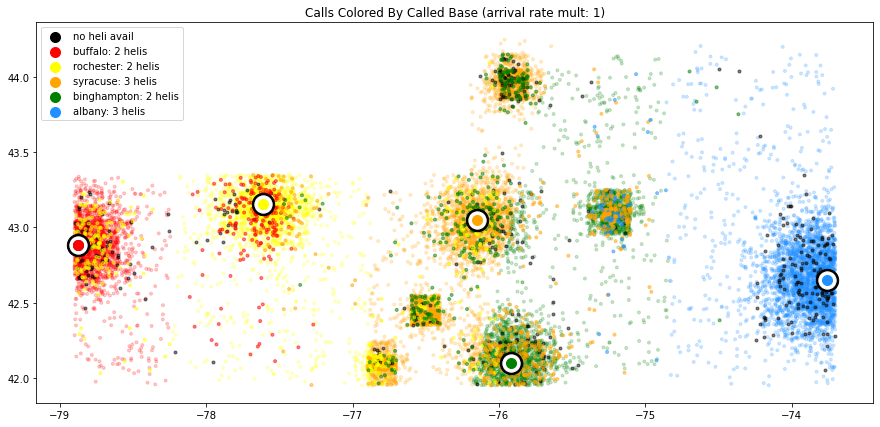

In [ ]:
s.plot_colored_calls_by_called_base()

__Improvement:__ <br>

Given two sets of bases and helis (`bases1` and `helis1` vs. `bases2` and `helis2`) and specified `warmup_period`, `running_length`, and `batch_length` this function returns the 95% confidence interval for the expected improvement in response times (in units of minutes) going from the first set of bases and helis to the second. <br>

A positive improvement means a decrease in expected response time and a negative improvement means an increase in expected response time.

In [ ]:
def improvement(bases1, helis1, bases2, helis2, warmup_period, running_length, batch_length):
  s1 = S(); s1.simulate(bases1, helis1, warmup_period = warmup_period, running_length = running_length, batch_length = batch_length)
  s2 = S(); s2.simulate(bases2, helis2, warmup_period = warmup_period, running_length = running_length, batch_length = batch_length)
  r1, r2 = np.array(s1.get_avg_response_times()), np.array(s2.get_avg_response_times())
  mean1, std1, num1 = np.mean(r1), np.std(r1), len(r1)
  mean2, std2, num2 = np.mean(r2), np.std(r2), len(r2)
  hw1, hw2 = st.norm.ppf(.975) * std1 / np.sqrt(num1), st.norm.ppf(.975) * std2 / np.sqrt(num2)
  ci1 = (mean1 - hw1, mean1 + hw1)
  ci2 = (mean2 - hw2, mean2 + hw2)
  return 60 * (ci1[0] - ci2[1]), 60 * (ci1[1] - ci2[0])

In [ ]:
bases1, helis1 = ('buffalo', 'rochester', 'syracuse', 'utica', 'albany'), (2,2,4,2,2)
bases2, helis2 = ('buffalo', 'rochester', 'syracuse', 'utica', 'albany'), (2,2,4,1,3)

In [ ]:
l, u = improvement(bases1, helis1, bases2, helis2, warmup_period = 4, running_length = 52, batch_length = 4)

In [ ]:
print('With 95% Certainty, the improvement is between ' + str(round(l, 2)) + ' and ' + str(round(u, 2)) + ' minutes')

With 95% Certainty, the improvement is between -0.46 and 0.58 minutes
